<a href="https://colab.research.google.com/github/gndedesmu/PythonProjects/blob/main/ML_Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm


In [ ]:
#1: Load the data

df = pd.read_csv(r"C:\Users\user\gndede\Adv_Python\Machine_Learning\lmdata.csv")

## Displays the DataFrame(df) - the 1st five rows and the last 5 rows

df.head()

,latitude,mortality
0,33.0,219
1,34.0,222
2,35.0,225
3,36.0,228
4,37.0,231


In [ ]:
##  Print the column names

print(df.columns)

Index(['latitude', 'mortality'], dtype='object')


In [ ]:
# Print the columns as list

print(list(df.columns))

['latitude', 'mortality']


In [ ]:
# Get all Column names 

for col_name in df.columns: 
    print(col_name)

latitude
mortality


In [ ]:
# Dataframe show all columns sorted list
sorted(df)

['latitude', 'mortality']

In [ ]:
#Print/Display the Column Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   24 non-null     float64
 1   mortality  24 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 512.0 bytes


In [ ]:
df.shape

(24, 2)

In [ ]:
#2: Generate descriptive statistics for the data

df.describe()

,latitude,mortality
count,24.000000,24.000000
mean,41.458333,255.250000
std,4.476792,23.882411
min,33.000000,219.000000
25%,38.375000,236.250000
50%,41.750000,253.500000
75%,45.125000,271.250000
max,48.500000,300.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,24.0,41.458333,4.476792,33.0,38.375,41.75,45.125,48.5
mortality,24.0,255.250000,23.882411,219.0,236.250,253.50,271.250,300.0


In [ ]:

stats = df.describe(include='all')
print (stats)

        latitude   mortality
count  24.000000   24.000000
mean   41.458333  255.250000
std     4.476792   23.882411
min    33.000000  219.000000
25%    38.375000  236.250000
50%    41.750000  253.500000
75%    45.125000  271.250000
max    48.500000  300.000000


In [ ]:
stats_numeric = df['latitude'].describe()
print (stats_numeric)

count    24.000000
mean     41.458333
std       4.476792
min      33.000000
25%      38.375000
50%      41.750000
75%      45.125000
max      48.500000
Name: latitude, dtype: float64


In [ ]:
stats_numeric = df['mortality'].describe()
print (stats_numeric)

count     24.000000
mean     255.250000
std       23.882411
min      219.000000
25%      236.250000
50%      253.500000
75%      271.250000
max      300.000000
Name: mortality, dtype: float64


C:\Users\Emily Kimani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mortality', ylabel='latitude'>

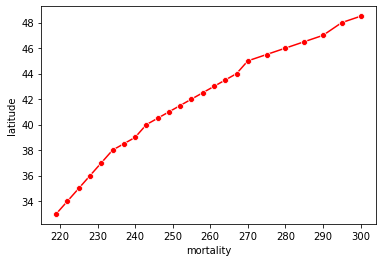

In [ ]:
#3: Create a line plot for the variables. Add a title and x & y axes.
##    a) Beautify the x-labels
##    b) plot a line graph

sns.lineplot('mortality', 'latitude', ci=None, color="red", marker='o', data=df)

##sns.lineplot('Day', 'x', data=df)

Text(0.5, 1.0, 'Mortality vs Latitude')

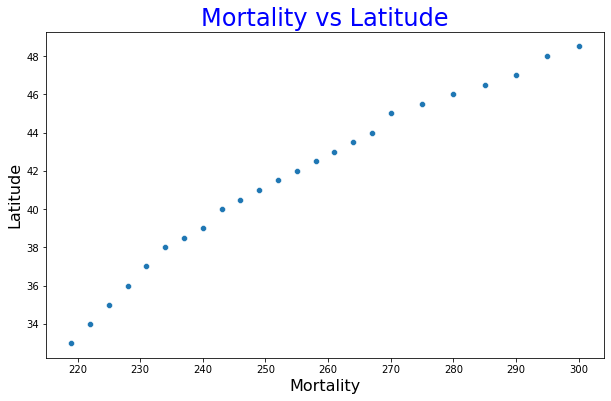

In [ ]:
#4: Create a scatter plot / Add title and (X,Y) axis names

plt.figure(figsize=(10,6))    ## Increase the size of the Seaborn plot
sns.scatterplot(x="mortality", y="latitude", data=df)   ## Make a scatter plot
plt.xlabel("Mortality", size=16)   ## X axis label and set the size
plt.ylabel("Latitude", size=16)      ## Y axis label and set the size
plt.title("Mortality vs Latitude", size=24, color="blue")  ## Set Seaborn Plot Title


Text(0.5, 1.0, 'Mortality vs Latitude')

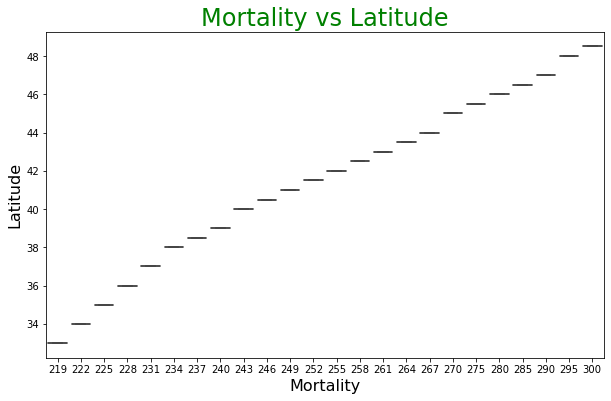

In [ ]:
#5: Create a Seaborn boxplot for mortality

plt.figure(figsize=(10,6))
emily = sns.boxplot(x="mortality", y="latitude", data=df)
plt.xlabel("Mortality", size=16)   ## X axis label and set the size
plt.ylabel("Latitude", size=16)      ## Y axis label and set the size
plt.title("Mortality vs Latitude", size=24, color="green")  ## Set Seaborn Plot Title



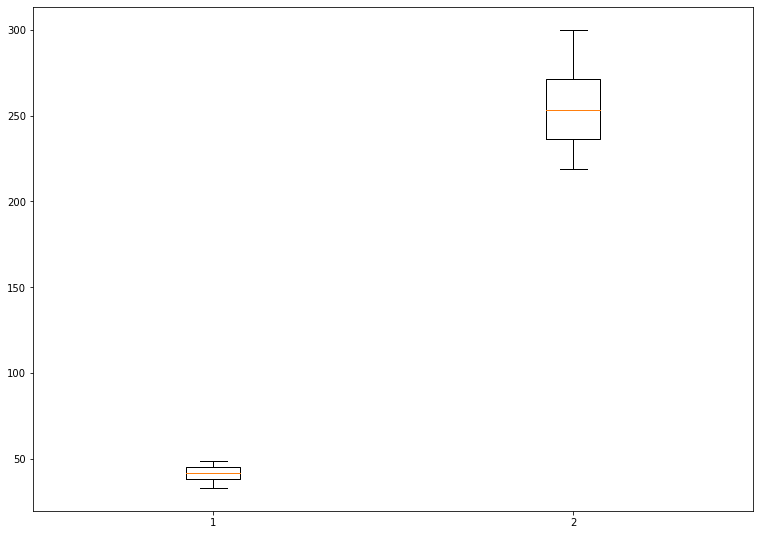

In [ ]:
## Create a Matplotlib Boxplot

fig = plt.figure(figsize =(10, 7))
  
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
  
# Creating plot
bp = ax.boxplot(df)

# show plot
plt.show()

In [ ]:
#6: Conduct a Pearson’s correlation test for the variables

## A Correlation Test is the strength of the association between two variables.
## Parametric Correlation : It measures a linear dependence between two variables (x and y) 
## & it depends on the distribution of the data.

from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr

# seed random number generator
seed(1)

# Convert dataframe into series
list1 = df['mortality']
list2 = df['latitude']
  
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)
  


Pearsons correlation: 0.985


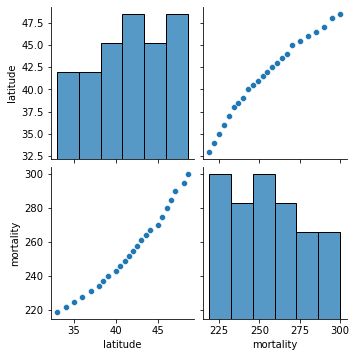

In [ ]:
#7: Create a pairs plot for the data
## Pairs plot allow us to see both distribution of single variables and relationships between two variables. 
## Pairs plot builds on two basic figures, the histogram and the scatter plot.


# Create the default pairplot
sns.pairplot(df)   ## call the pairplot function and then pass our df to it.


In [ ]:
#8: Type in this command: from statsmodels.formula.api import ols

from statsmodels.formula.api import ols

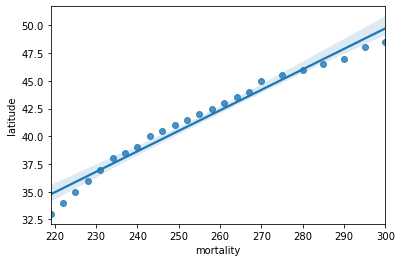

In [ ]:
## Regression Plots are used to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses.
## To obtain quantitative measures related to the fit of regression models, you should use statsmodels.
##  regplot() and lmplot() are Seaborn Functions used to visualize a linear relationship as determined through regression
## Both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and 
## Plot the resulting regression line and a 95% confidence interval for that regression:

#09: Create a Seaborn regplot of the regression model and a 95% confidence interval
#plot the regression model y ~ x and a 95% confidence interval for that regression


sns.regplot(x="mortality", y="latitude", data=df);


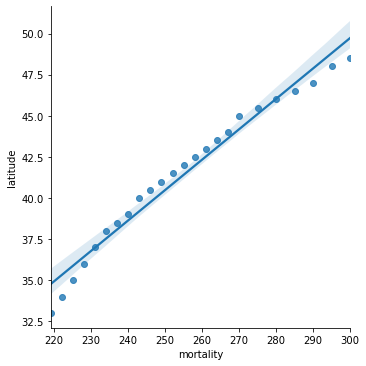

In [ ]:
sns.lmplot(x="mortality", y="latitude", data=df);


In [ ]:
#10: Create the regression model using ols() from the statsmodel package

x = df[['mortality']] 
y = df['latitude']

x = sm.add_constant(x) # adding a constant

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

#11: Print the model Summary
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               latitude   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     728.1
Date:                Thu, 01 Apr 2021   Prob (F-statistic):           2.36e-18
Time:                        11:55:27   Log-Likelihood:                -27.168
No. Observations:                  24   AIC:                             58.34
Df Residuals:                      22   BIC:                             60.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.6817      1.754     -3.239      0.0